In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
database = pd.read_csv('insurance.csv')

In [3]:
database.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
database.info()
#this gives us a general summary of the database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
print(database.isnull().values.any())
print(database.isnull().sum())

# Here we confirm what we already saw in the previous line of code, that there are no missing values in the database.

False
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
database.shape

# Number of rows and columns.

(1338, 7)

In [7]:
database.dtypes

# The datatypes of data in each column.

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
database.describe()

# 5-pt Summary of the numerical columns of the database.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
five_point_summary = pd.DataFrame(np.random.rand(4,7),index='Age BMI Children Charges'.split(),columns='Min 25% Mean Median Mode 75% Max'.split())
numerical_database = database[['age','bmi','children','charges']]

for i in range(4):
    min=numerical_database.iloc[:,i].min()
    q1=np.percentile(numerical_database.iloc[:,i],25)
    mean=numerical_database.iloc[:,i].mean()
    median=numerical_database.iloc[:,i].median()
    mode=numerical_database.iloc[:,i].mode()
    q3=np.percentile(numerical_database.iloc[:,i],75)
    max=numerical_database.iloc[:,i].max()
    
    smry= [min,q1,mean,median,mode,q3,max]
    five_point_summary.iloc[i,:]=smry
    
five_point_summary.head()

# Although we can easily get a 5-pt summary of all numerical columns using an inbuilt method, for clarity we executed the same using
# a for loop statement. 

,Min,25%,Mean,Median,Mode,75%,Max
Age,18.0000,27.00000,39.207025,39.000,18.0000,51.000000,64.00000
BMI,15.9600,26.29625,30.663397,30.400,32.3000,34.693750,53.13000
Children,0.0000,0.00000,1.094918,1.000,0.0000,2.000000,5.00000
Charges,1121.8739,4740.28715,13270.422265,9382.033,1639.5631,16639.912515,63770.42801


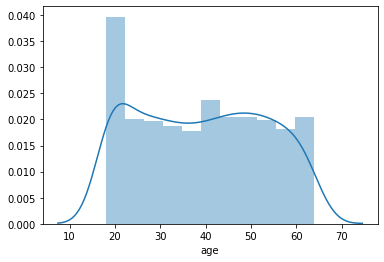

In [10]:
#Distribution of continuous data columns (bmi, age and charges)
sns.distplot(database['age'])

# age is pretty uniformly distributed except for a rise, in people below the age of 20.

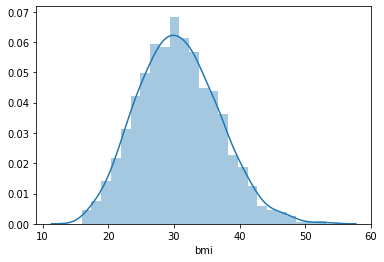

In [11]:
sns.distplot(database['bmi'])

# bmi is seen to have a gaussian destribution normally distributed around a mean of 30.

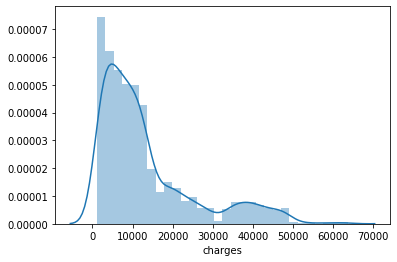

In [12]:
sns.distplot(database['charges'])

# Charges also seem to have a gaussian distribution with significantly more weight in the left tail (skew>0)

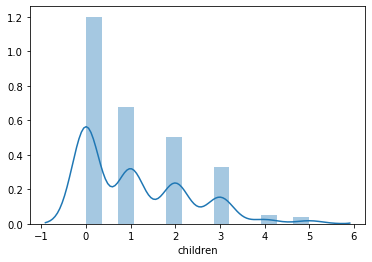

In [13]:
sns.distplot(database['children'])

# here we have a distribution with multiple peaks and heavily skewed to the left tail.

In [14]:
#Measure of skewness of continuous data columns
database.skew()

#skewness = 0 : normally distributed.
#skewness > 0 : more weight in the left tail of the distribution.
#skewness < 0 : more weight in the right tail of the distribution. 
#skewness = 3(mean-median)/standard deviation

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

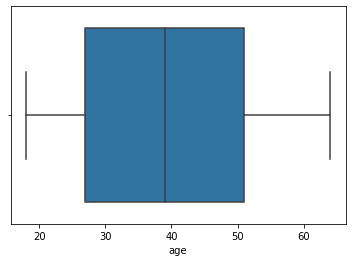

In [15]:
#Outlier Detection
sns.boxplot(database['age'])

# as apparent from the boxplot below, there are no outliers in the age column. This can be mathematically proven by calculating the 
# the upper (mean + 3std) and lower limit(mean - 3std) and checking for values outside this range. This has been done for examples
# below to determine the outliers when available.

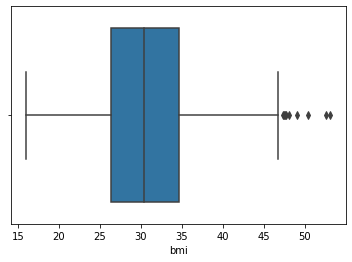

In [16]:
sns.boxplot(database['bmi'])

# In the case of bmi, there exist outliers above the upper limit but none below the lower limit.
# These outliers are calculated below.

In [17]:
outliers=[]
bmi_data=database['bmi']
mean=bmi_data.mean()
standard_deviation=bmi_data.std()
cutoff=standard_deviation*3
lower_limit=mean-cutoff
upper_limit=mean+cutoff

for i in bmi_data:
    if (i > upper_limit or i < lower_limit):
        outliers.append(i)

print('The Upper and Lower Limits are:')
print(upper_limit, lower_limit)
print('The Outliers in the Data are:')
print(outliers)

# If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation 
# of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.
# Hence anything exceeding these upper and lower limits (mean+3std, mean-3std) are considered outliers and are calculated below.

#Note : We may notice that the number of outliers calculated are lesser than those shown in the boxplot. This is because,
# while we use mathematical method to calculate outliers, we consider +/- 3std to determint the upper and lower limits, while in
# the case of boxplots the limits are calculated as Q1-1.5(IQR) and Q3+1.5(IQR) where Q1 is 25percentile, q3 is 75percentile IQR
# is the Inter Quartile range given as Q3-Q1. This makes the acceptable range  slightly less than 3std 
# hence more outliers are shown.

The Upper and Lower Limits are:
48.95795759602359 12.368836125949485
The Outliers in the Data are:
[49.06, 50.38, 52.58, 53.13]


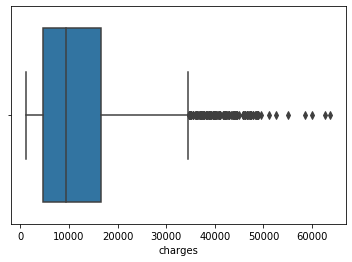

In [18]:
sns.boxplot(database['charges'])

# Once again there exist outliers above the upper limit but none below the lower limit. Outliers are calculated below.
# Since a significant amount of data seems to have been classified as outliers, we will increase the acceptable range via
# statistical methods as shown below.

In [19]:
outliers=[]
charges_data=database['charges']
mean=charges_data.mean()
standard_deviation=charges_data.std()
cutoff=standard_deviation*3
lower_limit=mean-cutoff
upper_limit=mean+cutoff

for i in charges_data:
    if (i > upper_limit or i < lower_limit):
        outliers.append(i)

print('The Outliers in the Data are:')
print(outliers)

The Outliers in the Data are:
[51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


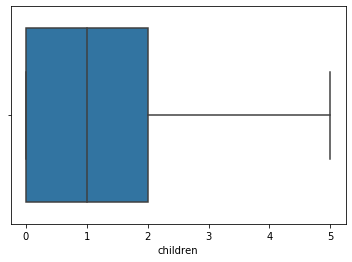

In [20]:
sns.boxplot(database['children'])

# No Outliers

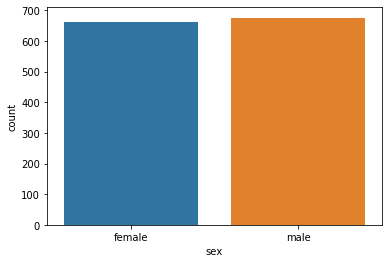

In [21]:
#Distribution of categorical columns
sns.countplot(database['sex'])

# Number of Male vs Female in the database.

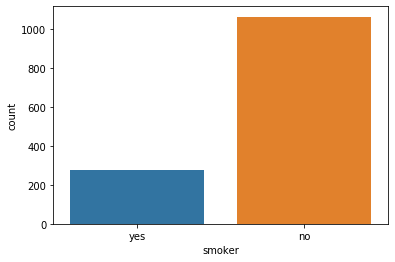

In [22]:
sns.countplot(database['smoker'])

#NUmber of Smokers vs Non-Smokers.

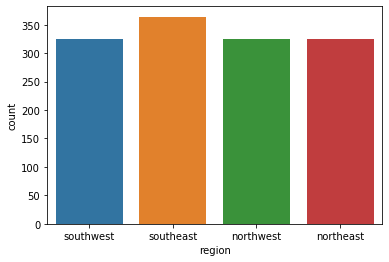

In [23]:
sns.countplot(database['region'])

# Clients by region

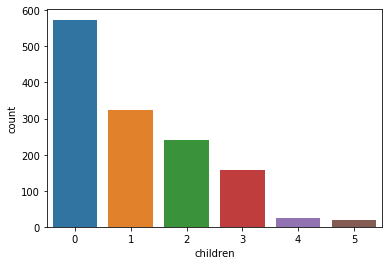

In [24]:
sns.countplot(database['children'])

# Classified by number of children.

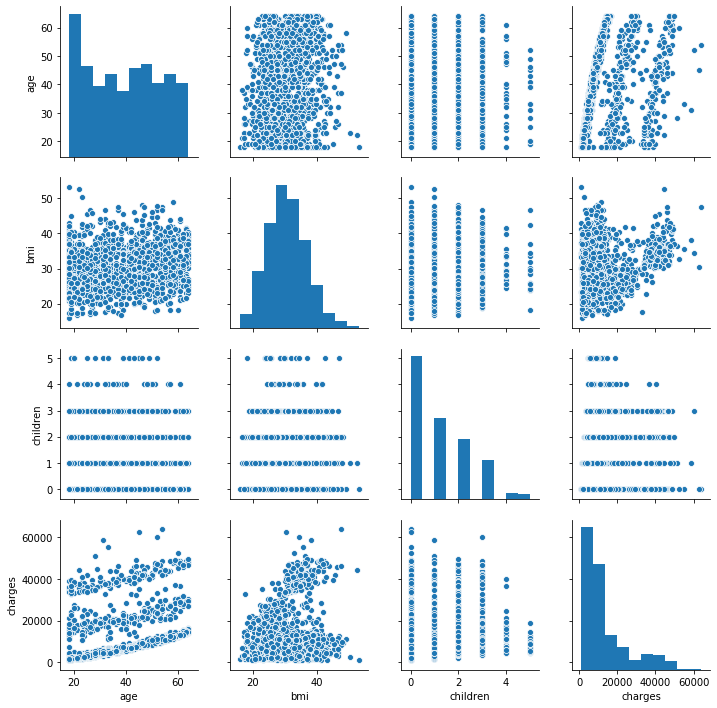

In [25]:
#Pair plot showing the relationship between all the columns of the data frame
sns.pairplot(database)

# We notice that bivariate relationship is shown only for continous data and not for categorical data. This is because the
# information from pairplots/jointplots including categorical values as one or both variables is pretty limited.
# This is demonstrated when categorical columns are included in the pairplot below.

In [26]:
modified_database = database

modified_database = modified_database.replace('female', 1)
modified_database = modified_database.replace('male', 0)
modified_database = modified_database.replace('yes', 0)
modified_database = modified_database.replace('no', 1)

# Converting Categorical Data into numerical data by assigning unique numerical to each category of a given column. This is 
# done in order to display them in pair plots and see if any usefu; information can be obtained.

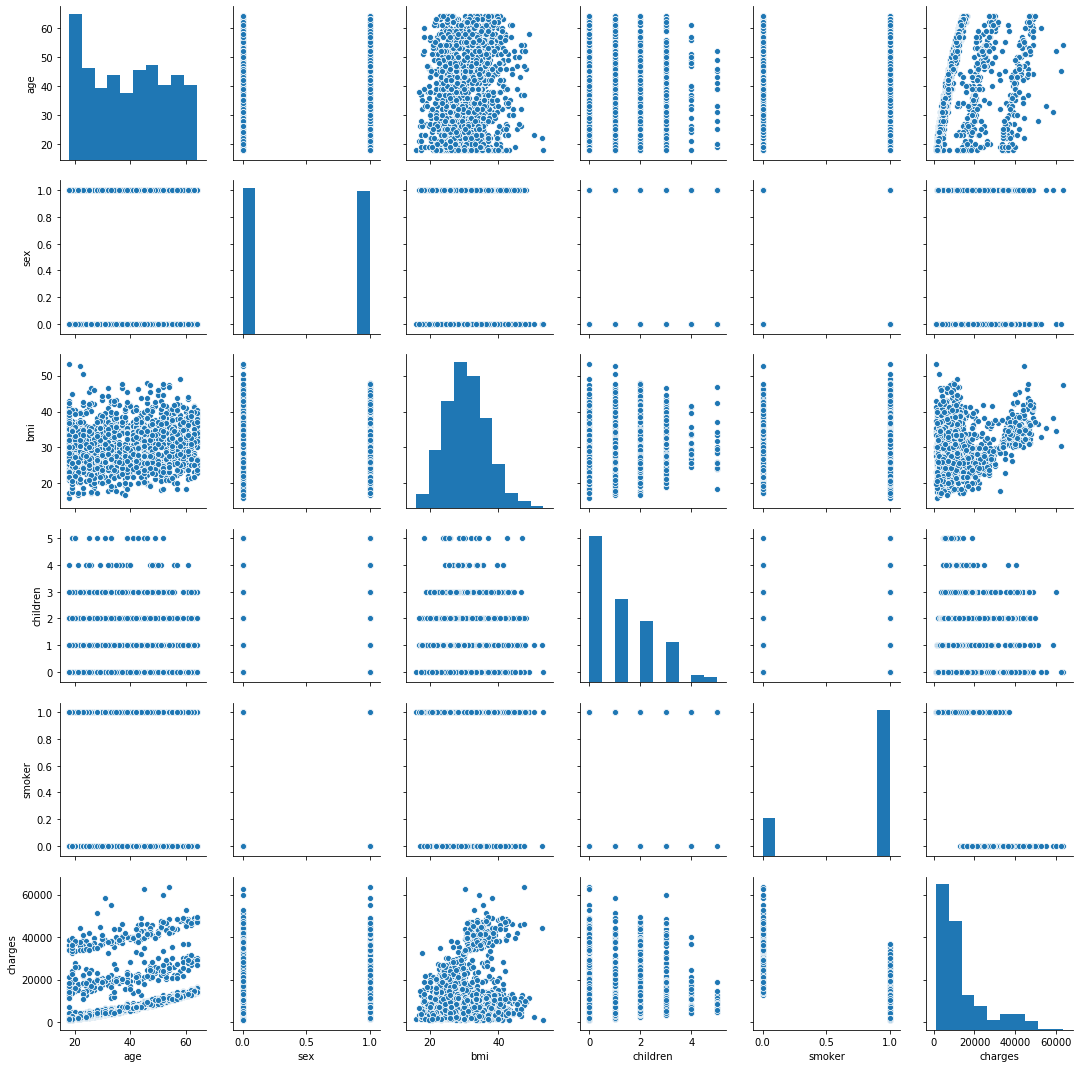

In [27]:
sns.pairplot(modified_database)

#pairplot showing bivariate relationship between the columns. The inference of these is discussed when we look at them one by
# one below. Note the limited use of including categorical variables.

#### Now lets answer some questions/ draw some conclusions.

In [28]:
database_male = database[database['sex']=='male']
database_female = database[database['sex']=='female']
database_smoker = database[database['smoker']=='yes']
database_nonsmoker = database[database['smoker']=='no']

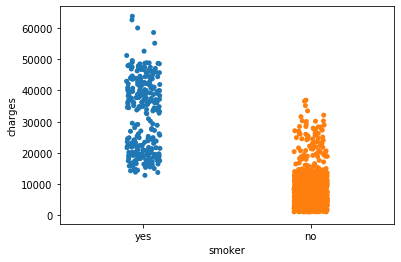

In [29]:
sns.stripplot(database['smoker'], database['charges'])

# This stripplot between smokers and Non-Smokers clearly shows that in genral the charges/medical expenses for smokers is
# higher when compared to Non-smokers.This is mathematically demonstrated below.

In [30]:
charges_smoker = database_smoker['charges'].mean()
charges_nonsmoker = database_nonsmoker['charges'].mean()

print('Mean charges for Smoker and Non Smoker:')
print (charges_smoker,charges_nonsmoker)

charges_smoker = database_smoker['charges'].median()
charges_nonsmoker = database_nonsmoker['charges'].median()

print('Median of charges for Smoker and Non Smoker:')
print (charges_smoker,charges_nonsmoker)

# As shown below, the difference in charges is quite significant, as was expected.

Mean charges for Smoker and Non Smoker:
32050.23183153285 8434.268297856199
Median of charges for Smoker and Non Smoker:
34456.348450000005 7345.4053


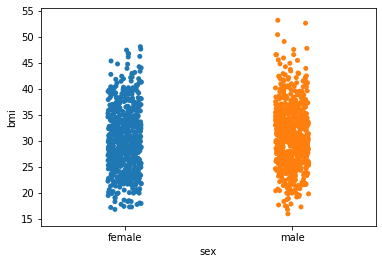

In [31]:
sns.stripplot(database['sex'], database['bmi'])

# Here we compare the bmi of males vs that of females. Graphically there doesnt appear to be much difference. We will
# prove it with some statistical evidence below. 
#Note: The presence of outliers in the male category may cause some doubt,which will be clarified below. 


In [32]:
bmi_male = database_male['bmi'].mean()
bmi_female = database_female['bmi'].mean()

print('Mean bmi for Males and Females:')
print (bmi_male,bmi_female)

bmi_male = database_male['bmi'].median()
bmi_female = database_female['bmi'].median()

print('Median of bmi for Males and Females:')
print (bmi_male,bmi_female)

# As expected the bmi distribution for males and females is pretty similar.

Mean bmi for Males and Females:
30.943128698224832 30.377749244713023
Median of bmi for Males and Females:
30.6875 30.1075


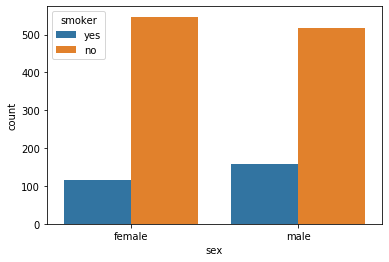

In [33]:
sns.countplot (database['sex'], hue=database['smoker'])

# Here we are intrested in the proportion of smokers in different genders. This is not easy to conclude graphically, 
# Hence we will calculate it below.

In [34]:
ratio_of_male_smokers = database_male[database_male['smoker']=='yes'].shape[0]/database_male.shape[0]
ratio_of_female_smokers = database_female[database_female['smoker']=='yes'].shape[0]/database_female.shape[0]
print('ratio of male smokers and female smokers is:')
print(ratio_of_male_smokers,ratio_of_female_smokers)

# The proportion of smokers in the male population is approximately 6% higher than that of the female population. 
# This is the conclusion we can draw from the data. Since the number of males and females in the data is roughly equal
# the conclusion drawn can be accepted.

ratio of male smokers and female smokers is:
0.23520710059171598 0.17371601208459214


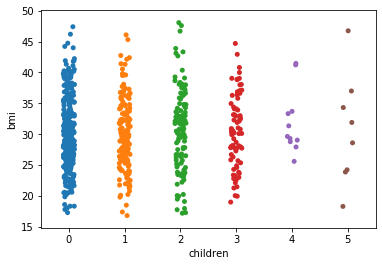

In [35]:
sns.stripplot(database_female['children'], database_female['bmi'])

# Here we are curious about the number of children a women has and its effect on their bmi. At first glance there doesnt appear
# to be much difference in the bmi distrbution based on numner of children.
# Note : We will not pay much attention to the 4 and 5 children categories due to the scarcity of data for these categories.

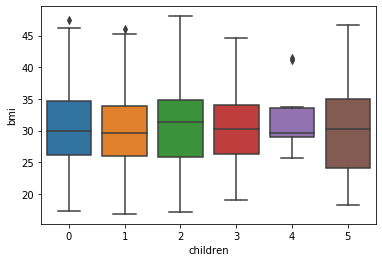

In [36]:
sns.boxplot(database_female['children'], database_female['bmi'])

# Since it was difficult to draw conclusions from the stripplot, we will look at the box plot for the same.
# The bmi distribution does appear similar for 0,1,2,3 children. We will try to get statistical evidence of the same, below.

In [37]:
children_bmi_summary = pd.DataFrame(np.random.rand(6,6),index='Zero One Two Three Four Five'.split(),columns='Min 25% Mean Median 75% Max'.split())

for i in range(6):
    n_children = database[database['children']==i]
    values = n_children['bmi']
    min=values.min()
    q1=np.percentile(values,25)
    mean=values.mean()
    median=values.median()
    q3=np.percentile(values,75)
    max=values.max()
    
    smry= [min,q1,mean,median,q3,max]
    children_bmi_summary.iloc[i,:]=smry
    
children_bmi_summary.head(10) 

# Here we have generated a Five Point Summary for bmi vs number of children (for women only).
# Looking at the 25percentile, mean, median & 75percentile for the different categories, we can conclude that number of children
# doesnt appear to have an effect on the bmi of a women, i.e the distribution of bmi for women vs the number of children shows 
# no significant difference and is pretty uniform for our given data.

,Min,25%,Mean,Median,75%,Max
Zero,15.960,26.14375,30.550296,30.3025,34.74625,53.13
One,16.815,26.61500,30.623148,30.0150,34.23750,52.58
Two,16.815,25.78625,30.978104,31.6400,35.35750,48.07
Three,18.905,27.26500,30.684331,30.4950,34.32000,46.53
Four,24.415,28.21500,31.391200,29.6400,33.66000,41.47
Five,18.300,24.30250,29.605000,28.5500,33.05500,46.75


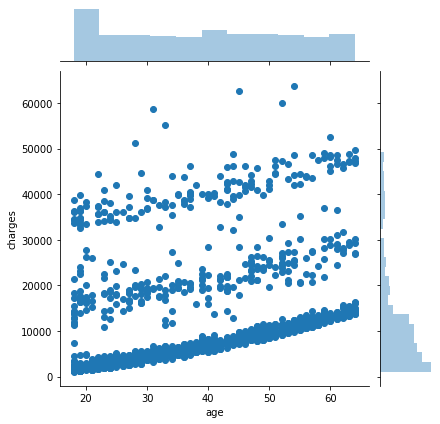

In [38]:
#Looking at some more bivariate relations with our primary focus on charges
sns.jointplot(database['age'], database['charges'])

# The below graph shows a linear relationship between age and charges. We can infer that,
# ' Larger the age of the client/patient higher are the charges/expenses'

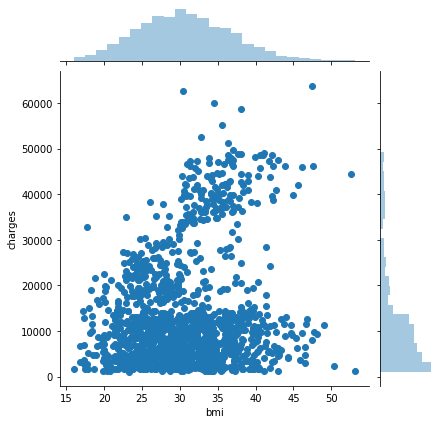

In [39]:
sns.jointplot(database['bmi'], database['charges'])

# Now looking at the relationship between bmi and charges, it appears that the higher charges are generally in the case
# of higher bmi (due to the cluster of charges between 30000-50000), although this is not always true.

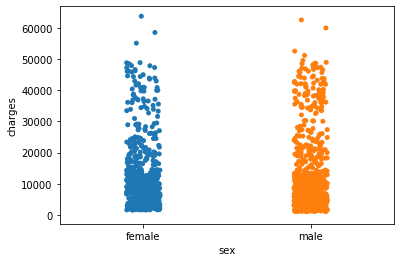

In [40]:
sns.stripplot(database['sex'], database['charges'])

# Sex of a client doesnt appear to affect the charges.